<a href="https://colab.research.google.com/github/encoras/Artificial-Intelligence-Group/blob/master/k_means_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

K-Means clustering on the handwritten digits data using Scikit Learn in Python


Adopted from (https://www.geeksforgeeks.org/k-means-clustering-on-the-handwritten-digits-data-using-scikit-learn-in-python/)



In [ ]:
from sklearn.datasets import load_digits
  
digits_data = load_digits().data

First handwritten digit data:  [ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


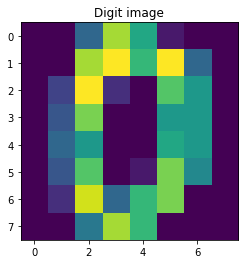

In [ ]:
import matplotlib.pyplot as plt
  
print("First handwritten digit data: " , digits_data[0])
sample_digit = digits_data[0].reshape(8, 8)
plt.imshow(sample_digit)
plt.title("Digit image")
plt.show()

In [ ]:
from sklearn.preprocessing import scale
  
scaled_data = scale(digits_data)
print(scaled_data)
  
Y = load_digits().target
print(Y)

[[ 0.         -0.33501649 -0.04308102 ... -1.14664746 -0.5056698
  -0.19600752]
 [ 0.         -0.33501649 -1.09493684 ...  0.54856067 -0.5056698
  -0.19600752]
 [ 0.         -0.33501649 -1.09493684 ...  1.56568555  1.6951369
  -0.19600752]
 ...
 [ 0.         -0.33501649 -0.88456568 ... -0.12952258 -0.5056698
  -0.19600752]
 [ 0.         -0.33501649 -0.67419451 ...  0.8876023  -0.5056698
  -0.19600752]
 [ 0.         -0.33501649  1.00877481 ...  0.8876023  -0.26113572
  -0.19600752]]
[0 1 2 ... 8 9 8]


#Method 1: Using a Random initial cluster.
Setting the initial cluster points as random data points by using the *‘init‘* argument.
The argument ‘*n_init‘* is the number of iterations the k-means clustering should run with different initial clusters chosen at random, in the end, the clustering with the least total variance is considered’
The random state is kept to 0 (any number can be given) to fix the same random initial clusters every time the code is run.

In [ ]:
from sklearn.cluster import KMeans
  
k = 10
kmeans_cluster = KMeans(init = "random",
                        n_clusters = k,
                        n_init = 10,
                        random_state = 0)

#Method 2: Using k-means++
It is similar to method-1 however, it is not completely random, and chooses the initial clusters far away from each other. Therefore, it should require fewer iterations in finding the clusters when compared to the random initialization.

In [ ]:
kmeans_cluster = KMeans(init="k-means++", n_clusters=k, n_init=10, random_state=0)

#Metrics

In [ ]:
import time
from sklearn.metrics.cluster import homogeneity_score, completeness_score, v_measure_score, adjusted_rand_score, adjusted_mutual_info_score, silhouette_score
def bench_k_means(estimator, name, data):
    initial_time = time.time()
    estimator.fit(data)
    print("Initial-cluster: " + name)
    print("Time taken: {0:0.3f}".format(time.time() - initial_time))
    print("Homogeneity: {0:0.3f}".format(
        homogeneity_score(Y, estimator.labels_)))
    print("Completeness: {0:0.3f}".format(
        completeness_score(Y, estimator.labels_)))
    print("V_measure: {0:0.3f}".format(
        v_measure_score(Y, estimator.labels_)))
    print("Adjusted random: {0:0.3f}".format(
        adjusted_rand_score(Y, estimator.labels_)))
    print("Adjusted mutual info: {0:0.3f}".format(
        adjusted_mutual_info_score(Y, estimator.labels_)))
    print("Silhouette: {0:0.3f}".format(silhouette_score(
        data, estimator.labels_, metric='euclidean', sample_size=300)))

#Results:

In [ ]:

kmeans_cluster = KMeans(init="random", n_clusters=k, n_init=10, random_state=0)
bench_k_means(estimator=kmeans_cluster, name="random", data=digits_data)
print('\n')  
kmeans_cluster = KMeans(init="k-means++", n_clusters=k,
                        n_init=100, random_state=0)
bench_k_means(estimator=kmeans_cluster, name="random", data=digits_data)

Initial-cluster: random
Time taken: 1.053
Homogeneity: 0.739
Completeness: 0.748
V_measure: 0.744
Adjusted random: 0.666
Adjusted mutual info: 0.741
Silhouette: 0.172


Initial-cluster: random
Time taken: 24.515
Homogeneity: 0.739
Completeness: 0.748
V_measure: 0.744
Adjusted random: 0.667
Adjusted mutual info: 0.741
Silhouette: 0.187


#Visualizing the K-means clustering for handwritten data:

## Clustering in 2D and vizualisation

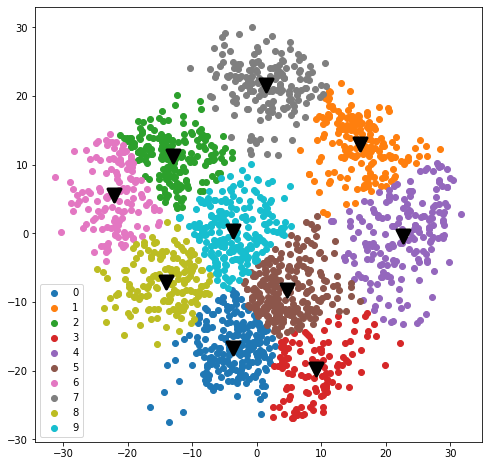

In [ ]:
from sklearn.decomposition import PCA
import numpy as np
  
# Reducing the dataset
pca = PCA(2)
reduced_data = pca.fit_transform(digits_data)
kmeans_cluster.fit(reduced_data)
  
# Calculating the centroids
centroids = kmeans_cluster.cluster_centers_
label = kmeans_cluster.predict(reduced_data)
unique_labels = np.unique(label)
  
# plotting the clusters:
plt.figure(figsize=(8, 8))
for i in unique_labels:
    plt.scatter(reduced_data[label == i, 0],
                reduced_data[label == i, 1],
                label=i)
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='v', s=169, linewidths=3,
            color='k', zorder=10)
plt.legend()
plt.show()

In [ ]:
centroids

array([[ -3.73661928, -16.67984794],
       [ 15.94703664,  12.96439819],
       [-13.004332  ,  11.29903394],
       [  9.16501604, -19.71232464],
       [ 22.63918267,  -0.35479344],
       [  4.74776832,  -8.25737541],
       [-22.06097373,   5.51684204],
       [  1.43194137,  21.56388591],
       [-14.05364865,  -7.02797499],
       [ -3.61505566,   0.36820658]])

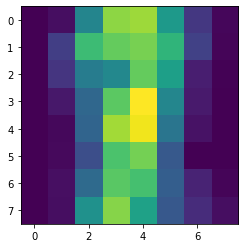

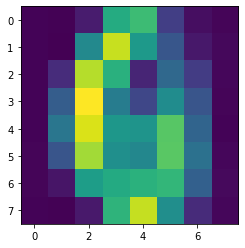

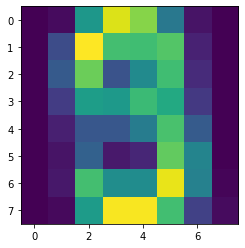

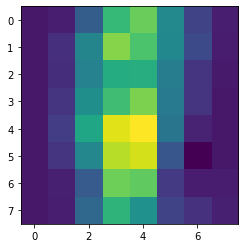

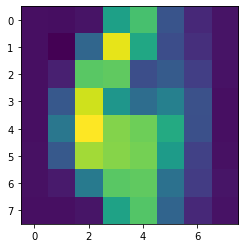

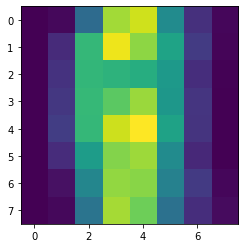

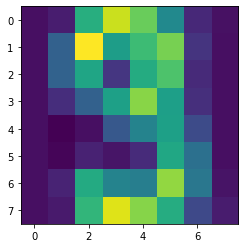

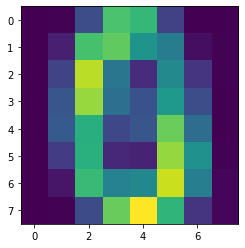

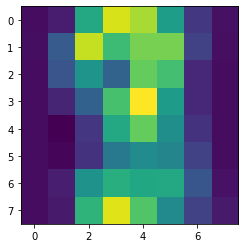

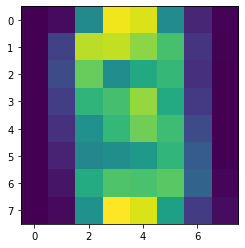

In [ ]:
centroids_recovered = pca.inverse_transform(centroids)
for i in range(k):
  sample_digit = centroids_recovered[i].reshape(8, 8)
  plt.imshow(sample_digit)
  plt.show()

##Clustering orig data and vizualisation in 2D

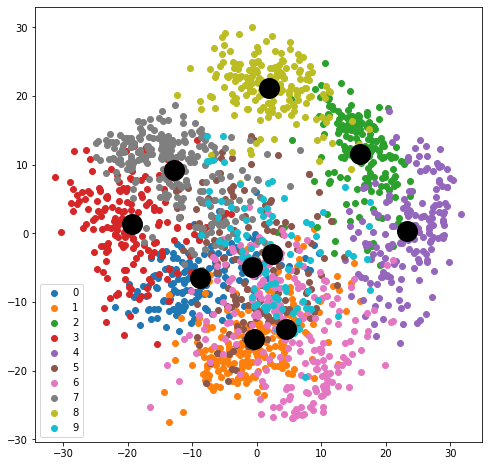

In [ ]:
from sklearn.decomposition import PCA
import numpy as np
  
# Reducing the dataset
pca = PCA(2)
reducer = pca.fit(digits_data)
reduced_data = reducer.transform(digits_data)
kmeans_cluster.fit(digits_data)
centroids_orig=kmeans_cluster.cluster_centers_

# Calculating the centroids
centroids = reducer.transform(centroids_orig)
label = kmeans_cluster.predict(digits_data)
unique_labels = np.unique(label)
  
# plotting the clusters:
plt.figure(figsize=(8, 8))
for i in unique_labels:
    plt.scatter(reduced_data[label == i, 0],
                reduced_data[label == i, 1],
                label=i)
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='o', s=169, linewidths=8,
            color='k', zorder=10)
plt.legend()
plt.show()

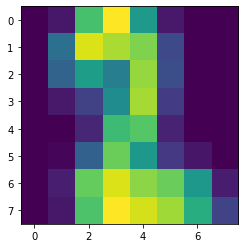

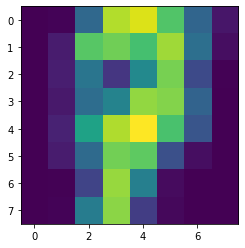

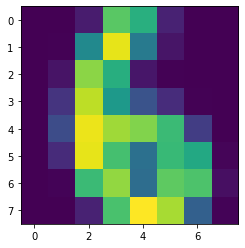

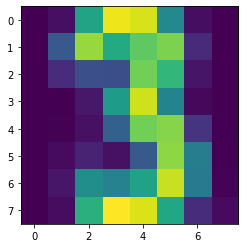

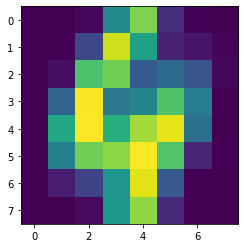

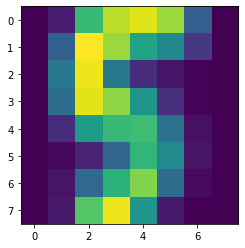

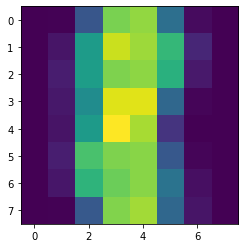

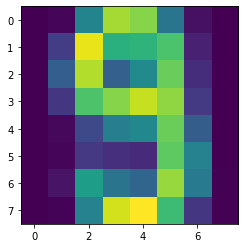

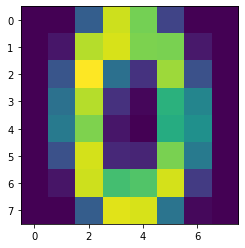

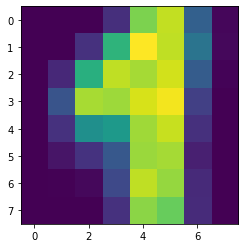

In [ ]:
for i in range(k):
  sample_digit = centroids_orig[i].reshape(8, 8)
  plt.imshow(sample_digit)
  plt.show()

## Elbow Method if we don't know the number of clusters

https://www.scikit-yb.org/en/latest/api/cluster/elbow.html

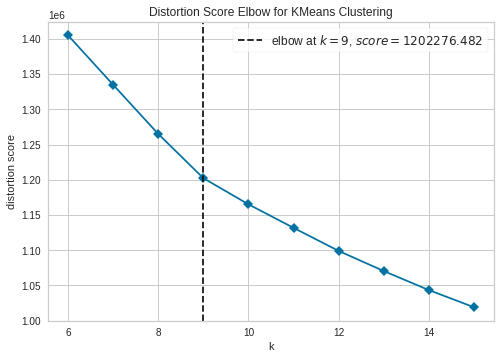

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
visualizer = KElbowVisualizer(kmeans_cluster, k=(6,16), metric='distortion', timings=False)
#metric='calinski_harabasz'
#metric='silhouette'
#metric='distortion'
visualizer.fit(digits_data)        # Fit the data to the visualizer
visualizer.show(timings=False)        # Finalize and render the figure

#Compute clustering with MeanShift

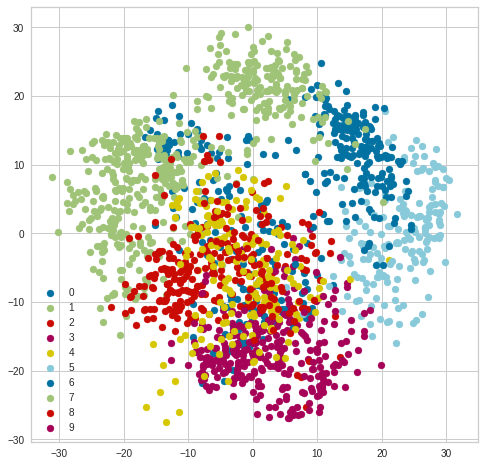

In [ ]:
from sklearn.cluster import AgglomerativeClustering
k=10
clustering = AgglomerativeClustering(n_clusters=k).fit(digits_data)


label = clustering.labels_
unique_labels = np.unique(label)
  
# plotting the clusters:
plt.figure(figsize=(8, 8))
for i in unique_labels:
    plt.scatter(reduced_data[label == i, 0],
                reduced_data[label == i, 1],
                label=i)

plt.legend()
plt.show()

In [ ]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

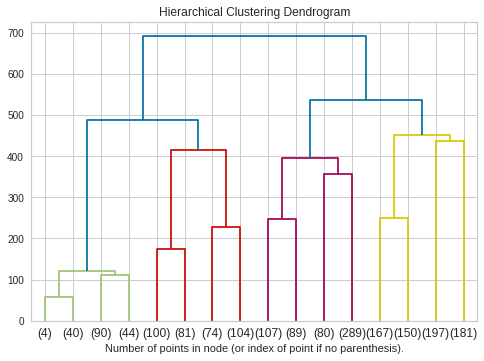

In [ ]:
from scipy.cluster.hierarchy import dendrogram

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None).fit(digits_data)



plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()